In [1]:
import tweepy
import pandas as pd

In [2]:
consumer_key = "cTBT1n87ukBpmM0QuCC3bGOwO"
consumer_secret = "tRq379XcJxGGi1IymKLOo9aDt4fkZAw04By0Vqfpot0N3EKEq8"
access_token = "436497459-tBgNtry64Zqzka11KVsxxJAnJo7GMLz0wriWYF3m"
access_token_secret = "aGL6TQzck6QRbDosDXXuHweOOSWTodkf3OxNPOCQhFY06"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Clean Data

In [3]:
import re

def clean_data(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #menghapus @mention
    text = re.sub('#', '', text) #menghapus hashtag
    text = re.sub('RT[\s]+', '', text) #menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) #menghapus hyperlink
    text = re.sub('\d+', '', text) #menghapus angka
    text = re.sub('[^\w\s]', '', text) #menghapus tanda baca
    text = re.sub(r'\b[a-zA-Z]\b', '', text) #menghapus single character
    text = re.sub('\n', '', text) #menghapus \n
    #text = text.strip() #menghaous spasi
    text = text.lower() #lowercase
    return text

# Stopwords

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools

def clean_stopwords(text):
    #dari data series
    #text = [word_tokenize(paragraf) for paragraf in text]
    #text = list(itertools.chain(*text))
    indo = stopwords.words('indonesian')
    data = [word for word in text if word not in indo]
    return data

# Stemming

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmer_(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    hasil_stem = []
    for i in range(len(text)):
        output   = stemmer.stem(text[i])
        hasil_stem.append(output)
    hasil = pd.Series(hasil_stem)
    return hasil

# Open File

In [6]:
import openpyxl
raw_data = pd.read_excel(r"raw_data_reshuffle.xlsx", engine="openpyxl")

In [7]:
tweet_data = pd.Series(raw_data['Tweet'])
tweet_data2 = tweet_data.drop_duplicates(keep='first',inplace=False).reset_index(drop=True)
tweet_data2

0       @jokowi Pak jokowi klo pnya kembaran diem diem...
1       @jokowi Saya himbau para mentri segera bekerja...
2               @jokowi semoga ga ada calon korupsi ya pa
3       @jokowi Selamat untuk para menteri baru,semoga...
4                        @jokowi Pak jokiwi keturunan pki
                              ...                        
1607    @zomel02 bukan kabinet nya yg perlu di resuffl...
1608    Ngapain berharap banyak dgn resuffle kabinet?\...
1609    Resuffle kabinet itu kayak vaksinasi Covid-19....
1610    Jika benar kuasa oligarki dan konglomerat itu,...
1611    Masalah bukan di anggota kabinet, tapi di kepa...
Name: Tweet, Length: 1612, dtype: object

In [8]:
clean_tweet = tweet_data2.apply(clean_data)

In [9]:
clean_tweet

0                 pak jokowi klo pnya kembaran diem diem 
1        saya himbau para mentri segera bekerja no tim...
2                       semoga ga ada calon korupsi ya pa
3        selamat untuk para menteri barusemoga dapat m...
4                                pak jokiwi keturunan pki
                              ...                        
1607     bukan kabinet nya yg perlu di resuffletapipre...
1608    ngapain berharap banyak dgn resuffle kabinetak...
1609    resuffle kabinet itu kayak vaksinasi covid ist...
1610    jika benar kuasa oligarki dan konglomerat itu ...
1611    masalah bukan di anggota kabinet tapi di kepal...
Name: Tweet, Length: 1612, dtype: object

In [10]:
#stem = stemmer_(clean_tweet)

In [11]:
#stem

In [12]:
#stopword
df = [word_tokenize(paragraf) for paragraf in clean_tweet]
indo = stopwords.words('indonesian')
indo.extend(['yg','nya', 'dgn', 'dg', 'dr', 'ya', 'yaa', 'aja', 'utk'])
hasil_stopword = []  
for i in range(len(df)):
    data = [word for word in df[i][:] if word not in indo]
    hasil_stopword.append(data)

hasil_join = []
for join in range(len(hasil_stopword)):
    hasil_join.append(' '.join(hasil_stopword[join]))
clean_data = hasil_join

In [28]:
clean_tweet

0                 pak jokowi klo pnya kembaran diem diem 
1        saya himbau para mentri segera bekerja no tim...
2                       semoga ga ada calon korupsi ya pa
3        selamat untuk para menteri barusemoga dapat m...
4                                pak jokiwi keturunan pki
                              ...                        
1607     bukan kabinet nya yg perlu di resuffletapipre...
1608    ngapain berharap banyak dgn resuffle kabinetak...
1609    resuffle kabinet itu kayak vaksinasi covid ist...
1610    jika benar kuasa oligarki dan konglomerat itu ...
1611    masalah bukan di anggota kabinet tapi di kepal...
Name: Tweet, Length: 1612, dtype: object

# Workcloud

In [13]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
from wordcloud import WordCloud

clean_data2 = (pd.Series(clean_data)).drop_duplicates(keep='first',inplace=False).reset_index(drop=True)
df_token = [word_tokenize(paragraf) for paragraf in clean_data2]
iter_= list(itertools.chain(*df_token))
fqdist = FreqDist(iter_)
fqdist.most_common(20)

[('semoga', 319),
 ('menteri', 274),
 ('indonesia', 230),
 ('selamat', 204),
 ('kabinet', 169),
 ('presiden', 160),
 ('amanah', 159),
 ('mentri', 135),
 ('jokowi', 133),
 ('maju', 113),
 ('resuffle', 102),
 ('rakyat', 90),
 ('bu', 77),
 ('risma', 69),
 ('negara', 67),
 ('tugas', 61),
 ('bangsa', 61),
 ('orang', 60),
 ('agama', 58),
 ('gak', 57)]

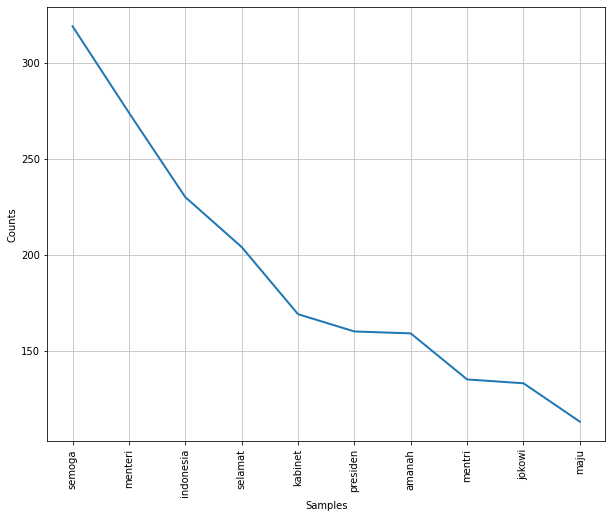

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
fqdist.plot(10,cumulative=False)
plt.show()

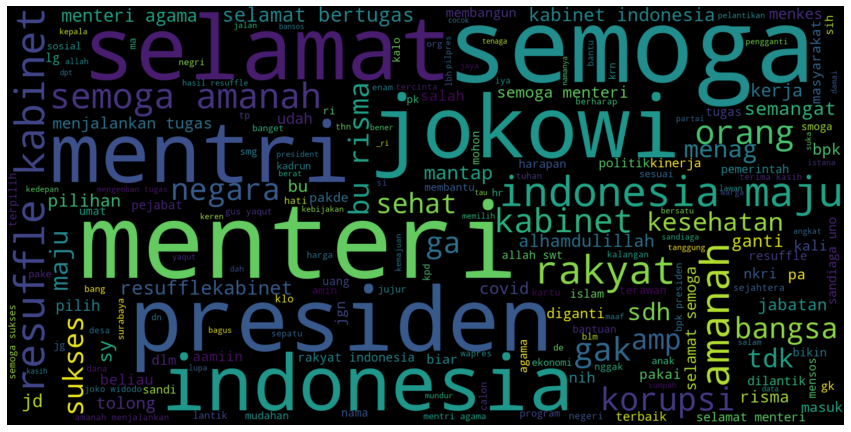

In [15]:
paragraf_baru = ' '.join(clean_data2)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(paragraf_baru)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
paragraf_baru

'jokowi klo pnya kembaran diem diem himbau mentri no time to lose situasi semoga ga calon korupsi pa selamat menteri barusemoga menjalankan tugas amanahkasian rakyat garagara covid rakyat kerja harga barang mahal gimana nasibnya rakyat jokiwi keturunan pki kondisi darurat indonesia penanganan wabah covid presiden joko widodo mengambil keputusan resuffle kabinet indonesia maju penghujung kah semoga indonesia baiknkrihargamati bhinekatunggalika bismillah alhamdulillahsemoga berkah amanah kedepannya biar indonesia maju rakyat mendukung mendoakan terbaik kejauhan mister jokowi gak salah menteri agamanya rakyat ga setuju mentri kesehatan jg allah pakkk eling tanggung jwb ahiratnya berat jk milih org salah rakyat jd korban semog amanah prabowo sandiaga uno rapat kabinet resufflekabinet barakallah semoga allah barakah kelancaran kemudahan mengemban amanah aamiin assalamualaikum wr wb sekolah berstatus negri tarikan gambiran banyuwangimohon solusinya trims menterinya selamat dehbagaimana tunja

# Sentiment Analysis - Positive Negative Neutral

In [17]:
import numpy as np

pos_list= open("./positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./negatif.txt","r")
neg_kata = neg_list.readlines()

hasil = []
for item in clean_data:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item:
            count_n +=1
    # print ("positif: "+str(count_p))
    # print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    # print ("-----------------------------------------------------")
    
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

Nilai rata-rata: 1.619727047146402
Standar deviasi: 2.858522224008298


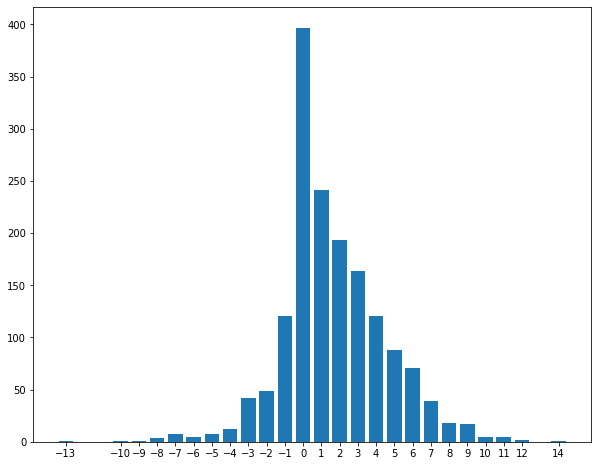

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [19]:
result = pd.DataFrame(tweet_data2)
result ['label'] = hasil
result ['clean'] = clean_data

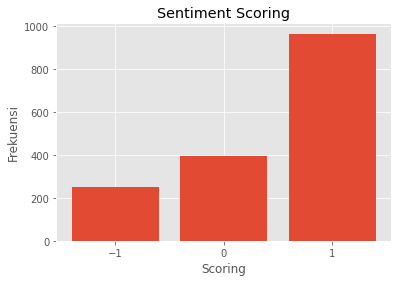

 1    965
 0    397
-1    250
Name: new_label, dtype: int64

In [20]:
def label_data(x):
    if x['label'] > 0:
        nilai = 1
    elif x['label'] < 0:
        nilai = -1
    else:
        nilai = 0
    return nilai

result['new_label'] = result.apply(lambda x: label_data(x), axis=1)

plt.style.use('ggplot')
plt.title('Sentiment Scoring')
plt.xlabel('Scoring')
plt.ylabel('Frekuensi')
labels, counts = np.unique(result['new_label'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()
result['new_label'].value_counts()

In [21]:
import xlsxwriter

result.to_excel("train_test_label.xlsx", engine='xlsxwriter', index=False)

# Sentiment Analysis - Naive Bayes

## Bag of Words (BOW)

In [22]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

cv = CountVectorizer(ngram_range=(1,1))
tfidf = TfidfVectorizer(max_features=2500)
data_cv = cv.fit_transform(result['clean'])
data_tfidf = tfidf.fit_transform(result['clean']).toarray()

## Compiling, Fitting, Evaluating Model

              precision    recall  f1-score   support

          -1       0.02      1.00      0.04         1
           0       0.09      0.47      0.15        15
           1       0.98      0.61      0.75       307

    accuracy                           0.60       323
   macro avg       0.36      0.69      0.31       323
weighted avg       0.94      0.60      0.72       323



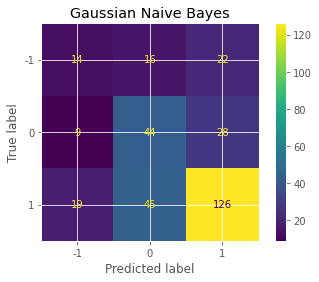

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(data_cv, result['new_label'], test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(data_tfidf, result['new_label'], test_size=0.2, random_state=0)

#TF-IDF Data
MNB = MultinomialNB()
MNB.fit(x_train,y_train)
accuracy_MNB = metrics.accuracy_score(MNB.predict(x_test),y_test)
#print('accuracy_MNB =', accuracy_MNB*100, '%')

CNB = ComplementNB()
CNB.fit(x_train,y_train)
accuracy_CNB = metrics.accuracy_score(CNB.predict(x_test),y_test)
#print('accuracy_CNB =', accuracy_CNB*100, '%')

BNB = BernoulliNB()
BNB.fit(x_train,y_train)
accuracy_BNB = metrics.accuracy_score(BNB.predict(x_test),y_test)
#print('accuracy_BNB =', accuracy_BNB*100, '%')

GNB = GaussianNB()
GNB.fit(x_train,y_train)
accuracy_GNB = metrics.accuracy_score(GNB.predict(x_test),y_test)

plot_cm = plot_confusion_matrix(GNB, x_test,y_test)
plot_cm.ax_.set_title('Gaussian Naive Bayes')
print((classification_report(MNB.predict(x_test),y_test)))
#print('nilai akurasinya adalah ',metrics.accuracy_score(y_test, MNB.predict(x_test)))

#Count Vectorize Data
MNB.fit(X_train,Y_train)
accuracy_MNB_cv = metrics.accuracy_score(MNB.predict(X_test),Y_test)
#print('accuracy_MNB_cv =', accuracy_MNB_cv*100, '%')

CNB.fit(X_train,Y_train)
accuracy_CNB_cv = metrics.accuracy_score(CNB.predict(X_test),Y_test)
#print('accuracy_CNB_cv =', accuracy_CNB_cv*100, '%')

BNB.fit(X_train,Y_train)
accuracy_BNB_cv = metrics.accuracy_score(BNB.predict(X_test),Y_test)
#print('accuracy_BNB_cv =', accuracy_BNB_cv*100, '%')

## Result

In [24]:
model = MNB.fit(x_train,y_train)
v_data = tfidf.transform(result['Tweet']).toarray()
_preds = model.predict(v_data)
#result.drop(columns=['hasil_prediksi'])

In [25]:
result.to_excel('hasil_prediksi.xlsx', engine='xlsxwriter', index=False)

# Sentiment Analysis - Non Bayesian

accuracy_LSVC = 70.58823529411765 %
              precision    recall  f1-score   support

          -1       0.31      0.57      0.40        28
           0       0.60      0.53      0.56        93
           1       0.86      0.81      0.83       202

    accuracy                           0.71       323
   macro avg       0.59      0.64      0.60       323
weighted avg       0.74      0.71      0.72       323

nilai akurasinya adalah  0.7058823529411765


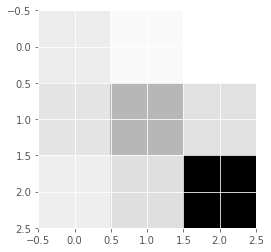

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

#TF-IDF Data
SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
accuracy_SGDC = metrics.accuracy_score(SGDC.predict(x_test),y_test)
#print('accuracy_SGDC =', accuracy_SGDC*100, '%')

LSVC = LinearSVC()
LSVC.fit(x_train, y_train)
accuracy_LSVC = metrics.accuracy_score(LSVC.predict(x_test),y_test)
print('accuracy_LSVC =', accuracy_LSVC*100, '%')
c = (confusion_matrix(LSVC.predict(x_test),y_test))
plt.imshow(c, cmap='binary', interpolation='None')
print(classification_report(LSVC.predict(x_test),y_test))
print('nilai akurasinya adalah ',metrics.accuracy_score(y_test, LSVC.predict(x_test)))

#Count Vectorize Data
SGDC.fit(X_train,Y_train)
accuracy_SGDC_cv = metrics.accuracy_score(SGDC.predict(X_test),Y_test)
#print('accuracy_SGDC_cv =', accuracy_SGDC_cv*100, '%')

LSVC.fit(X_train,Y_train)
accuracy_LSVC_cv = metrics.accuracy_score(LSVC.predict(X_test),Y_test)
#print('accuracy_LSVC_cv =', accuracy_LSVC_cv*100, '%')